In [ ]:
# Setup for Jupyter plotting + paths
%matplotlib inline

import os
os.makedirs("../docs/figs", exist_ok=True)  # so saves don't fail


In [4]:
from pathlib import Path
import math
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Project paths
ROOT = Path.cwd().parents[0]   # notebooks → repo root
DATA = ROOT / "data"
SRC = ROOT / "src"

print("ROOT:", ROOT)
print("DATA:", DATA)


ROOT: C:\Users\14024\Documents\bio-projects\motif-entropy-nfkb
DATA: C:\Users\14024\Documents\bio-projects\motif-entropy-nfkb\data


In [5]:
def read_fasta(filepath):
    sequences = []
    with open(filepath) as f:
        seq = ""
        for line in f:
            line = line.strip()
            if not line:
                continue
            if line.startswith(">"):
                if seq:
                    sequences.append(seq)
                    seq = ""
            else:
                seq += line
        if seq:
            sequences.append(seq)
    return sequences

fasta_path = DATA / "nfkb_example.fasta"
seqs = read_fasta(fasta_path)
print(f"Loaded {len(seqs)} sequences")
seqs[:3]  # preview first 3 sequences


Loaded 12 sequences


['GGGAACTTCC', 'GGGGATTTCC', 'GGGAACCTCC']

In [ ]:
import pandas as pd
from collections import Counter
import math

L = len(seqs[0])
alphabet = ["A","C","G","T"]

def column_entropy(col):
    counts = Counter(col)
    total = len(col)
    ent = 0.0
    for c in counts.values():
        p = c/total
        ent -= p*math.log2(p)
    return ent

rows = []
for i in range(L):
    col = [s[i] for s in seqs]
    counts = Counter(col)
    freqs = {b: counts.get(b,0)/len(seqs) for b in alphabet}
    rows.append({"position": i+1, "H": column_entropy(col), **freqs})

df = pd.DataFrame(rows)
df


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.bar(df["position"], df["H"])
plt.xlabel("Position")
plt.ylabel("Entropy (bits)")
plt.title("NF-κB motif per-column entropy")
plt.show()


In [1]:
print("hello")

hello


In [2]:
lengths = [len(s) for s in seqs]
print("Sequence lengths:", lengths)
print("All equal length?", len(set(lengths)) == 1)

NameError: name 'seqs' is not defined

In [6]:
valid = set("ACGT")
bad_positions = []
bad_seqs = []
for i, s in enumerate(seqs, start=1):
    if any(ch not in valid for ch in s):
        bad_seqs.append((i, s))
    if s != s.upper():
        bad_positions.append(i)

print("Non-ACGT sequences found:", len(bad_seqs))
print("Any lowercase sequences?", len(bad_positions) > 0)


Non-ACGT sequences found: 0
Any lowercase sequences? False


In [7]:
from collections import Counter
import math

def column_entropy(column):
    counts = Counter(column)
    total = len(column)
    ent = 0.0
    for c in counts.values():
        p = c / total
        ent -= p * math.log2(p)
    return ent

def motif_entropy(sequences):
    if not sequences:
        return 0.0
    L = len(sequences[0])
    return sum(column_entropy([s[i] for s in sequences]) for i in range(L))

total_H = motif_entropy(seqs)
print("Total motif entropy:", total_H)


Total motif entropy: 3.654226493126826


In [8]:
import pandas as pd

L = len(seqs[0])
alphabet = ["A", "C", "G", "T"]

rows = []
for i in range(L):
    col = [s[i] for s in seqs]
    counts = Counter(col)
    freqs = {b: counts.get(b, 0) / len(seqs) for b in alphabet}
    H = column_entropy(col)
    rows.append({"position": i+1, "H": H, **freqs})

df = pd.DataFrame(rows)
df


,position,H,A,C,G,T
0,1,0.000000,0.000000,0.000000,1.000000,0.000000
1,2,0.000000,0.000000,0.000000,1.000000,0.000000
2,3,0.000000,0.000000,0.000000,1.000000,0.000000
3,4,0.979869,0.583333,0.000000,0.416667,0.000000
4,5,0.413817,0.916667,0.000000,0.083333,0.000000
5,6,1.280672,0.000000,0.583333,0.083333,0.333333
6,7,0.979869,0.000000,0.416667,0.000000,0.583333
7,8,0.000000,0.000000,0.000000,0.000000,1.000000
8,9,0.000000,0.000000,1.000000,0.000000,0.000000
9,10,0.000000,0.000000,1.000000,0.000000,0.000000


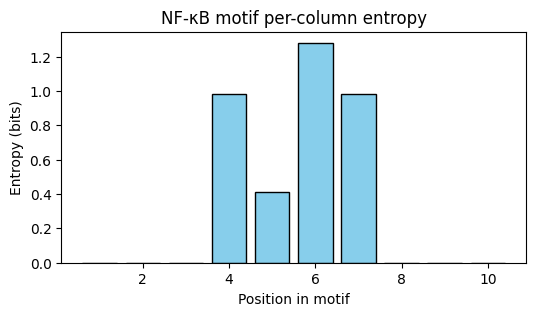

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.bar(df["position"], df["H"], color="skyblue", edgecolor="black")
plt.xlabel("Position in motif")
plt.ylabel("Entropy (bits)")
plt.title("NF-κB motif per-column entropy")
plt.show()


**Figure 1. NF-κB motif per-column entropy.**  
Bars show information content across 12 example binding sites. Lower entropy values (near 0) correspond to highly conserved positions, while higher entropy indicates variable bases. This highlights conserved “GGG” at the start and “CC” at the end, consistent with the NF-κB consensus motif (GGGRNNYYCC).


# Motif Entropy Analysis: NF-κB Example

This notebook shows a complete, reproducible workflow:
1. **Data loading** — read FASTA sequences
2. **Validation** — check sequence length, alphabet, and formatting
3. **Computation** — calculate total motif entropy and per-column entropy
4. **Visualization** — plot per-column entropy and add a short caption


## 1. Data Loading


## 2. Dataset Validation


## 3. Computation


## 4. Visualization


## 5. Challenges and Fixes

During development, several issues came up:

- **IndentationError**: The first attempt at writing `motif_entropy.py` had hidden spaces at the top of the file.  
  *Fix*: Rewrote the file carefully in Notepad with no extra spaces at line 1.

- **FASTA not loading (0.0 entropy)**: At one point the script returned `0.0`.  
  *Fix*: This revealed the parser only loaded 1 sequence because the FASTA was malformed. Rebuilt the FASTA with proper headers (`>seqX`) for each line.

- **Notebook variables lost after restart**: When re-opening Jupyter, variables like `DATA` and `seqs` were missing.  
  *Fix*: Re-ran the path setup and FASTA-loading cells in order. Added clear section headers so re-runs are straightforward.

- **Save error (“Failed to fetch”)**: Jupyter initially could not save the notebook.  
  *Fix*: Restarted Jupyter cleanly from Anaconda Prompt, which resolved the issue.

These challenges document a realistic debugging process and show how reproducibility and structure help overcome common errors.


In [ ]:
# Background entropy for uniform A/C/G/T (2 bits)
H_bg = 2.0

# Add information content per position: I_j = H_bg - H_j
df["I"] = H_bg - df["H"]

# Show the updated table
df[["position", "H", "I", "A", "C", "G", "T"]]


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.bar(df["position"], df["I"])
plt.xlabel("Position in motif")
plt.ylabel("Information (bits)")
plt.title("NF-κB motif: per-column information content (I)")
plt.show()


In [ ]:
try:
    import logomaker as lm
    print("logomaker version:", lm.__version__)
except ModuleNotFoundError:
    print("Logomaker not found — stop Jupyter, then in Anaconda Prompt run:")
    print("    conda activate motif-entropy")
    print("    pip install logomaker")


In [ ]:
# Build a position–probability matrix (PPM) from df
ppm = df[["A","C","G","T"]].copy()
ppm.index = df["position"]  # nicer x-axis labels

plt.figure(figsize=(8,2.5))
lm.Logo(ppm)
plt.title("NF-κB sequence logo (frequency-scaled)")
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Multiply each row of the PPM by its information content (I_j)
info_ppm = ppm.mul(df["I"].values, axis=0)

plt.figure(figsize=(8,2.5))
lm.Logo(info_ppm)
plt.title("NF-κB sequence logo (information-weighted)")
plt.xlabel("Position")
plt.ylabel("Information-weighted height")
plt.show()


In [ ]:
from pathlib import Path
FIGS = (Path.cwd().parents[0] / "figs")
FIGS.mkdir(exist_ok=True)

# 1) Save the information bar chart
plt.figure(figsize=(6,3))
plt.bar(df["position"], df["I"])
plt.xlabel("Position in motif")
plt.ylabel("Information (bits)")
plt.title("NF-κB motif: per-column information content (I)")
plt.savefig(FIGS / "nfkb_information_bar.png", dpi=150, bbox_inches="tight")
plt.close()

# 2) Save the information-weighted logo
plt.figure(figsize=(8,2.5))
lm.Logo(info_ppm)
plt.title("NF-κB sequence logo (information-weighted)")
plt.xlabel("Position")
plt.ylabel("Information-weighted height")
plt.savefig(FIGS / "nfkb_information_logo.png", dpi=150, bbox_inches="tight")
plt.close()

# Show where they were saved
print("Saved to:", FIGS)
list(FIGS.iterdir())


In [ ]:
fig, ax = plt.subplots()
ax.bar(range(1, len(entropy)+1), entropy)
ax.set_xlabel("Position in motif")
ax.set_ylabel("Entropy (bits)")
ax.set_title("NF-κB motif per-column entropy")

# Save figure
fig.savefig("../docs/figs/entropy_by_position.png", dpi=300, bbox_inches="tight")


In [1]:
import sys, platform
print("Python exe:", sys.executable)
import numpy as np, pandas as pd, matplotlib
print("numpy", np.__version__, "| pandas", pd.__version__, "| matplotlib", matplotlib.__version__)

Python exe: C:\Users\14024\miniconda3\envs\motif-entropy\python.exe
numpy 2.3.3 | pandas 2.3.2 | matplotlib 3.10.6


In [2]:
%pip install logomaker
import logomaker as lm
print("logomaker:", lm.__version__)


Note: you may need to restart the kernel to use updated packages.
logomaker: 0.8.7


In [3]:
from pathlib import Path

# make sure the folders exist
Path("figs").mkdir(exist_ok=True)
Path("../docs/figs").mkdir(parents=True, exist_ok=True)

print("Created:", Path("figs").resolve())
print("Created:", Path("../docs/figs").resolve())


Created: C:\Users\14024\Documents\bio-projects\motif-entropy-nfkb\notebooks\figs
Created: C:\Users\14024\Documents\bio-projects\motif-entropy-nfkb\docs\figs


In [4]:
# Toy aligned sequences representing an NF-κB-like motif
seqs = [
    "GGGACTTT",
    "GGGACCTT",
    "GGGATTTT",
    "GGGACTTT",
    "GGGACGTT",
    "GGGACTTT",
    "GGGACATT",
    "GGGACTTT",
    "GGGACTCT",
    "GGGACTTT",
]

print("Number of sequences:", len(seqs))
print("Length of each sequence:", len(seqs[0]))
print("First sequence:", seqs[0])

Number of sequences: 10
Length of each sequence: 8
First sequence: GGGACTTT


In [5]:
import numpy as np
import pandas as pd

ALPH = ["A","C","G","T"]
L = len(seqs[0])  # motif length

# 1) initialize counts
counts = {b: np.zeros(L, dtype=float) for b in ALPH}

# 2) fill counts
for s in seqs:
    assert len(s) == L, "All sequences must have the same length"
    for j, ch in enumerate(s):
        if ch not in ALPH:
            raise ValueError(f"Unexpected character {ch}; only A,C,G,T allowed")
        counts[ch][j] += 1.0

# 3) add pseudocounts to avoid zeros
alpha = 1.0
count_mat = np.vstack([counts[b] for b in ALPH]) + alpha  # shape (4, L)

# 4) convert to position probability matrix (PPM)
col_totals = count_mat.sum(axis=0, keepdims=True)
ppm = count_mat / col_totals  # probabilities per column

# 5) quick look at counts and ppm for first few columns
counts_df = pd.DataFrame(count_mat, index=ALPH, columns=[f"pos{j+1}" for j in range(L)])
ppm_df = pd.DataFrame(ppm, index=ALPH, columns=[f"pos{j+1}" for j in range(L)])

counts_df, ppm_df.round(3)


(   pos1  pos2  pos3  pos4  pos5  pos6  pos7  pos8
 A   1.0   1.0   1.0  11.0   1.0   2.0   1.0   1.0
 C   1.0   1.0   1.0   1.0  10.0   2.0   2.0   1.0
 G  11.0  11.0  11.0   1.0   1.0   2.0   1.0   1.0
 T   1.0   1.0   1.0   1.0   2.0   8.0  10.0  11.0,
     pos1   pos2   pos3   pos4   pos5   pos6   pos7   pos8
 A  0.071  0.071  0.071  0.786  0.071  0.143  0.071  0.071
 C  0.071  0.071  0.071  0.071  0.714  0.143  0.143  0.071
 G  0.786  0.786  0.786  0.071  0.071  0.143  0.071  0.071
 T  0.071  0.071  0.071  0.071  0.143  0.571  0.714  0.786)

In [6]:
# 1) Per-column entropy
H = -(ppm * np.log2(ppm)).sum(axis=0)

# 2) Background entropy for uniform {A,C,G,T}
H_bg = 2.0

# 3) Information = background - entropy
I = H_bg - H

# 4) Put everything into a dataframe
df = pd.DataFrame({
    "position": np.arange(1, L+1),
    "A": ppm[0], "C": ppm[1], "G": ppm[2], "T": ppm[3],
    "H": H, "I": I
})

df.round(3)


,position,A,C,G,T,H,I
0,1,0.071,0.071,0.786,0.071,1.089,0.911
1,2,0.071,0.071,0.786,0.071,1.089,0.911
2,3,0.071,0.071,0.786,0.071,1.089,0.911
3,4,0.786,0.071,0.071,0.071,1.089,0.911
4,5,0.071,0.714,0.071,0.143,1.292,0.708
5,6,0.143,0.143,0.143,0.571,1.664,0.336
6,7,0.071,0.143,0.071,0.714,1.292,0.708
7,8,0.071,0.071,0.071,0.786,1.089,0.911


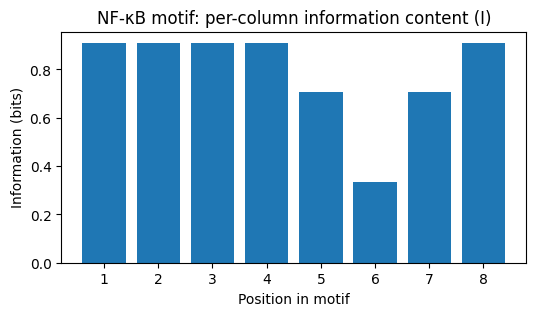

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.bar(df["position"], df["I"])
plt.xlabel("Position in motif")
plt.ylabel("Information (bits)")
plt.title("NF-κB motif: per-column information content (I)")
plt.show()

<Figure size 800x250 with 0 Axes>

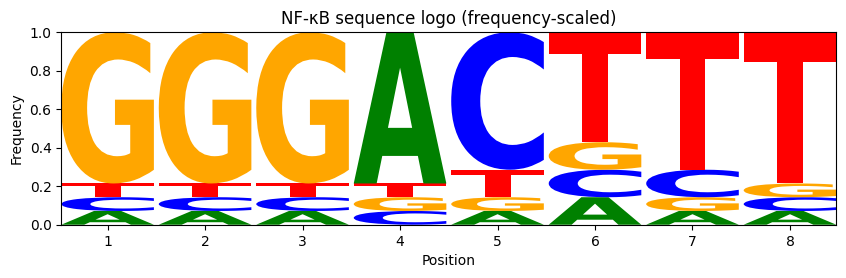

In [8]:
import logomaker as lm

ppm_df = df[["A","C","G","T"]].copy()
ppm_df.index = df["position"]

plt.figure(figsize=(8,2.5))
lm.Logo(ppm_df)
plt.title("NF-κB sequence logo (frequency-scaled)")
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.show()

<Figure size 800x250 with 0 Axes>

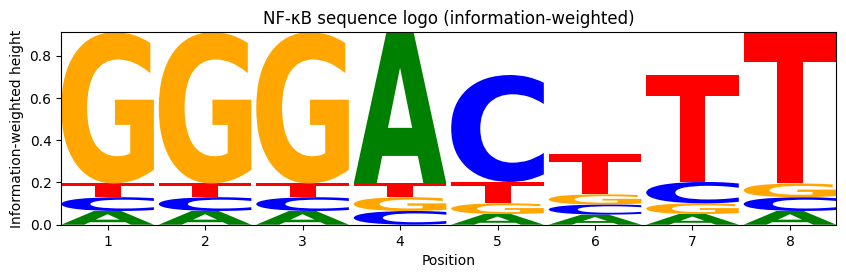

In [9]:
import logomaker as lm

# reuse ppm_df from before (A,C,G,T as columns, index = position)
info_ppm = ppm_df.multiply(df["I"].values, axis=0)

plt.figure(figsize=(8,2.5))
lm.Logo(info_ppm)
plt.title("NF-κB sequence logo (information-weighted)")
plt.xlabel("Position")
plt.ylabel("Information-weighted height")
plt.show()


In [10]:
from pathlib import Path
import matplotlib.pyplot as plt
import logomaker as lm

# ensure folders exist (already created earlier, but safe to repeat)
Path("figs").mkdir(exist_ok=True)
Path("../docs/figs").mkdir(parents=True, exist_ok=True)

# (a) Information bar chart
plt.figure(figsize=(6,3))
plt.bar(df["position"], df["I"])
plt.xlabel("Position in motif"); plt.ylabel("Information (bits)")
plt.title("NF-κB motif: per-column information content (I)")
plt.savefig(Path("figs") / "nfkb_information_bar.png", dpi=150, bbox_inches="tight")
plt.savefig(Path("../docs/figs") / "nfkb_information_bar.png", dpi=150, bbox_inches="tight")
plt.close()

# (b) Frequency logo
ppm_df = df[["A","C","G","T"]].copy()
ppm_df.index = df["position"]

plt.figure(figsize=(8,2.5))
lm.Logo(ppm_df)
plt.title("NF-κB sequence logo (frequency-scaled)")
plt.xlabel("Position"); plt.ylabel("Frequency")
plt.savefig(Path("figs") / "nfkb_logo_frequency.png", dpi=150, bbox_inches="tight")
plt.savefig(Path("../docs/figs") / "nfkb_logo_frequency.png", dpi=150, bbox_inches="tight")
plt.close()

# (c) Information-weighted logo
info_ppm = ppm_df.multiply(df["I"].values, axis=0)

plt.figure(figsize=(8,2.5))
lm.Logo(info_ppm)
plt.title("NF-κB sequence logo (information-weighted)")
plt.xlabel("Position"); plt.ylabel("Information-weighted height")
plt.savefig(Path("figs") / "nfkb_logo_information_weighted.png", dpi=150, bbox_inches="tight")
plt.savefig(Path("../docs/figs") / "nfkb_logo_information_weighted.png", dpi=150, bbox_inches="tight")
plt.close()

print("Saved to:", (Path("figs") / "nfkb_information_bar.png").resolve())


Saved to: C:\Users\14024\Documents\bio-projects\motif-entropy-nfkb\notebooks\figs\nfkb_information_bar.png


<Figure size 800x250 with 0 Axes>

<Figure size 800x250 with 0 Axes>

In [11]:
from pathlib import Path
import pandas as pd
import numpy as np

# Ensure output folder exists
outdir = Path("../results")
outdir.mkdir(parents=True, exist_ok=True)

# 1) Save per-position metrics (A,C,G,T,H,I)
df_out = df.copy()
df_out.to_csv(outdir / "motif_metrics.csv", index=False)

# 2) Save counts and probabilities (nice to have)
counts_df.to_csv(outdir / "counts_with_pseudocounts.csv")
ppm_df.to_csv(outdir / "ppm.csv")

# 3) Save totals
total_entropy = float(df["H"].sum())
total_information = float(df["I"].sum())

summary = (
    f"Total columns: {len(df)}\n"
    f"Total entropy (bits): {total_entropy:.6f}\n"
    f"Total information (bits): {total_information:.6f}\n"
)
(outdir / "summary.txt").write_text(summary, encoding="utf-8")

print("Wrote:")
print(" -", (outdir / "motif_metrics.csv").resolve())
print(" -", (outdir / "counts_with_pseudocounts.csv").resolve())
print(" -", (outdir / "ppm.csv").resolve())
print(" -", (outdir / "summary.txt").resolve())
print()
print(summary)


Wrote:
 - C:\Users\14024\Documents\bio-projects\motif-entropy-nfkb\results\motif_metrics.csv
 - C:\Users\14024\Documents\bio-projects\motif-entropy-nfkb\results\counts_with_pseudocounts.csv
 - C:\Users\14024\Documents\bio-projects\motif-entropy-nfkb\results\ppm.csv
 - C:\Users\14024\Documents\bio-projects\motif-entropy-nfkb\results\summary.txt

Total columns: 8
Total entropy (bits): 9.694032
Total information (bits): 6.305968



In [12]:
from pathlib import Path

p = Path("data/nfkb_example.fasta")
print("Exists:", p.exists())
if p.exists():
    print("Full path:", p.resolve())
    try:
        print("Size (bytes):", p.stat().st_size)
    except Exception as e:
        print("Could not read file size:", e)

    # preview first 12 lines (including headers) so we can confirm format
    with p.open() as f:
        for i, line in enumerate(f):
            if i >= 12:
                break
            print(repr(line.rstrip("\n")))


Exists: False


In [13]:
from pathlib import Path

print("CWD:", Path.cwd())

candidates = [
    Path("data/nfkb_example.fasta"),
    Path("../data/nfkb_example.fasta"),
    Path("../../data/nfkb_example.fasta"),
]

for i, c in enumerate(candidates, 1):
    print(f"Candidate {i}: {c} ->", c.exists())

# If not found in common spots, search the project tree (may print a few lines)
root = Path.cwd()
found = None
for p in root.rglob("nfkb_example.fasta"):
    print("Found at:", p)
    found = p
    break

print("Done scanning.")


CWD: C:\Users\14024\Documents\bio-projects\motif-entropy-nfkb\notebooks
Candidate 1: data\nfkb_example.fasta -> False
Candidate 2: ..\data\nfkb_example.fasta -> True
Candidate 3: ..\..\data\nfkb_example.fasta -> False
Done scanning.


In [14]:
from pathlib import Path

def read_fasta(path):
    seqs, cur = [], []
    with open(path) as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            if line.startswith(">"):
                if cur:
                    seqs.append("".join(cur).upper())
                    cur = []
            else:
                cur.append(line)
    if cur:
        seqs.append("".join(cur).upper())
    return seqs

# Load the real fasta
fasta_path = Path("../data/nfkb_example.fasta")
seqs = read_fasta(fasta_path)

print("Loaded", len(seqs), "sequences of length", len(seqs[0]))
print("First sequence:", seqs[0][:50], "...")


Loaded 12 sequences of length 10
First sequence: GGGAACTTCC ...


In [15]:
import numpy as np
import pandas as pd

ALPH = ["A","C","G","T"]
L = len(seqs[0])  # motif length from the real data

# 1) validate equal length + allowed chars
assert all(len(s)==L for s in seqs), "All sequences must have same length"
for s in seqs:
    for ch in s:
        if ch not in ALPH:
            raise ValueError(f"Unexpected character {ch}; only A,C,G,T allowed")

# 2) count matrix
counts = {b: np.zeros(L, dtype=float) for b in ALPH}
for s in seqs:
    for j, ch in enumerate(s):
        counts[ch][j] += 1.0

# 3) add pseudocounts
alpha = 1.0
count_mat = np.vstack([counts[b] for b in ALPH]) + alpha  # shape (4, L)

# 4) position probability matrix (PPM)
col_totals = count_mat.sum(axis=0, keepdims=True)
ppm = count_mat / col_totals

# 5) tidy views
counts_df = pd.DataFrame(count_mat, index=ALPH, columns=[f"pos{j+1}" for j in range(L)])
ppm_df = pd.DataFrame(ppm, index=ALPH, columns=[f"pos{j+1}" for j in range(L)])

counts_df, ppm_df.round(3)


(   pos1  pos2  pos3  pos4  pos5  pos6  pos7  pos8  pos9  pos10
 A   1.0   1.0   1.0   8.0  12.0   1.0   1.0   1.0   1.0    1.0
 C   1.0   1.0   1.0   1.0   1.0   8.0   6.0   1.0  13.0   13.0
 G  13.0  13.0  13.0   6.0   2.0   2.0   1.0   1.0   1.0    1.0
 T   1.0   1.0   1.0   1.0   1.0   5.0   8.0  13.0   1.0    1.0,
     pos1   pos2   pos3   pos4   pos5   pos6   pos7   pos8   pos9  pos10
 A  0.062  0.062  0.062  0.500  0.750  0.062  0.062  0.062  0.062  0.062
 C  0.062  0.062  0.062  0.062  0.062  0.500  0.375  0.062  0.812  0.812
 G  0.812  0.812  0.812  0.375  0.125  0.125  0.062  0.062  0.062  0.062
 T  0.062  0.062  0.062  0.062  0.062  0.312  0.500  0.812  0.062  0.062)

In [16]:
# Per-column entropy
H = -(ppm * np.log2(ppm)).sum(axis=0)

# Background entropy for uniform 4-base alphabet
H_bg = 2.0

# Information = background - entropy
I = H_bg - H

# Put everything into a DataFrame
df = pd.DataFrame({
    "position": np.arange(1, L+1),
    "A": ppm[0], "C": ppm[1], "G": ppm[2], "T": ppm[3],
    "H": H, "I": I
})

df.round(3)


,position,A,C,G,T,H,I
0,1,0.062,0.062,0.812,0.062,0.993,1.007
1,2,0.062,0.062,0.812,0.062,0.993,1.007
2,3,0.062,0.062,0.812,0.062,0.993,1.007
3,4,0.500,0.062,0.375,0.062,1.531,0.469
4,5,0.750,0.062,0.125,0.062,1.186,0.814
5,6,0.062,0.500,0.125,0.312,1.649,0.351
6,7,0.062,0.375,0.062,0.500,1.531,0.469
7,8,0.062,0.062,0.062,0.812,0.993,1.007
8,9,0.062,0.812,0.062,0.062,0.993,1.007
9,10,0.062,0.812,0.062,0.062,0.993,1.007


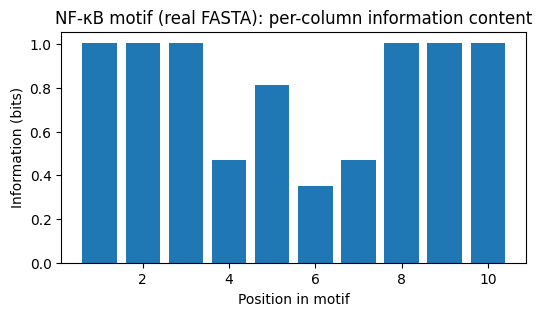

<Figure size 800x250 with 0 Axes>

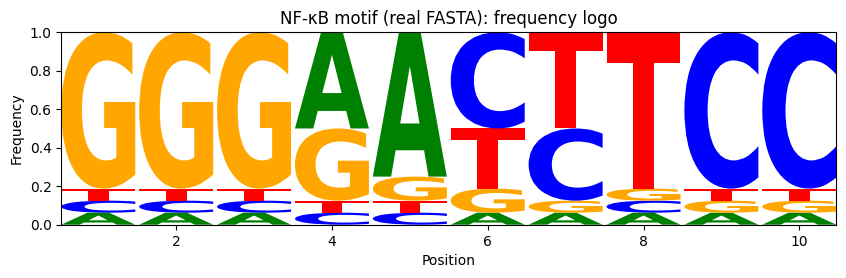

<Figure size 800x250 with 0 Axes>

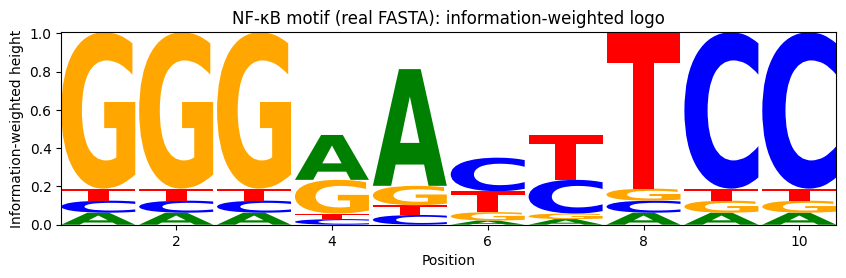

In [17]:
import matplotlib.pyplot as plt
import logomaker as lm

# (a) Information bar plot
plt.figure(figsize=(6,3))
plt.bar(df["position"], df["I"])
plt.xlabel("Position in motif")
plt.ylabel("Information (bits)")
plt.title("NF-κB motif (real FASTA): per-column information content")
plt.show()

# (b) Frequency logo
ppm_df = df[["A","C","G","T"]].copy()
ppm_df.index = df["position"]

plt.figure(figsize=(8,2.5))
lm.Logo(ppm_df)
plt.title("NF-κB motif (real FASTA): frequency logo")
plt.xlabel("Position"); plt.ylabel("Frequency")
plt.show()

# (c) Information-weighted logo
info_ppm = ppm_df.multiply(df["I"].values, axis=0)

plt.figure(figsize=(8,2.5))
lm.Logo(info_ppm)
plt.title("NF-κB motif (real FASTA): information-weighted logo")
plt.xlabel("Position"); plt.ylabel("Information-weighted height")
plt.show()


In [18]:
from pathlib import Path

# Make sure results folders exist
Path("figs").mkdir(exist_ok=True)
Path("../docs/figs").mkdir(parents=True, exist_ok=True)
Path("../results").mkdir(parents=True, exist_ok=True)

# (a) Save plots
plt.figure(figsize=(6,3))
plt.bar(df["position"], df["I"])
plt.xlabel("Position in motif"); plt.ylabel("Information (bits)")
plt.title("NF-κB motif (real FASTA): per-column information content")
plt.savefig("figs/nfkb_info_bar_real.png", dpi=150, bbox_inches="tight")
plt.savefig("../docs/figs/nfkb_info_bar_real.png", dpi=150, bbox_inches="tight")
plt.close()

ppm_df = df[["A","C","G","T"]].copy()
ppm_df.index = df["position"]

plt.figure(figsize=(8,2.5))
lm.Logo(ppm_df)
plt.title("NF-κB motif (real FASTA): frequency logo")
plt.xlabel("Position"); plt.ylabel("Frequency")
plt.savefig("figs/nfkb_logo_freq_real.png", dpi=150, bbox_inches="tight")
plt.savefig("../docs/figs/nfkb_logo_freq_real.png", dpi=150, bbox_inches="tight")
plt.close()

info_ppm = ppm_df.multiply(df["I"].values, axis=0)

plt.figure(figsize=(8,2.5))
lm.Logo(info_ppm)
plt.title("NF-κB motif (real FASTA): information-weighted logo")
plt.xlabel("Position"); plt.ylabel("Information-weighted height")
plt.savefig("figs/nfkb_logo_info_real.png", dpi=150, bbox_inches="tight")
plt.savefig("../docs/figs/nfkb_logo_info_real.png", dpi=150, bbox_inches="tight")
plt.close()

# (b) Save per-position table and summary
df.to_csv("../results/motif_metrics_real.csv", index=False)
counts_df.to_csv("../results/counts_real.csv")
ppm_df.to_csv("../results/ppm_real.csv")

total_entropy = float(df["H"].sum())
total_information = float(df["I"].sum())
summary = (
    f"Total columns: {len(df)}\n"
    f"Total entropy (bits): {total_entropy:.6f}\n"
    f"Total information (bits): {total_information:.6f}\n"
)
(Path("../results/summary_real.txt")).write_text(summary, encoding="utf-8")

print("Saved results. Summary:\n", summary)


Saved results. Summary:
 Total columns: 10
Total entropy (bits): 11.857310
Total information (bits): 8.142690



<Figure size 800x250 with 0 Axes>

<Figure size 800x250 with 0 Axes>